# Tảo biển (1s, 50MB)

Tảo biển sinh sản rất nhanh khi có môi trường thuận lợi với chúng và có những loài còn tiết ra môi trường những chất độc hại.

Một loại tảo nâu trong môi trường nước bị ô nhiễm nặng sinh sản theo quy luật sau:

* Ngày đầu tiên (ngày 0) có **n** cá thể ở mức 1.
* Ở mỗi ngày tiếp theo, mỗi cá thể mức **i** sinh ra **i** cá thể mức 1, các cá thể mới sinh sẽ sinh sôi, phát triển từ ngày hôm sau.
* Bản thân các cá thể mức **i** phát triển thành mức **i+1** và chu kỳ phát triển trong ngày chấm dứt.

Hãy xác định sau **k** ngày trong nước biển có bao nhiêu cá thể.

**Dữ liệu**: Vào từ thiết bị nhập chuẩn gồm một dòng chứa 2 số nguyên **n** và **k** $(1 ≤ n ≤ 1000, 1 ≤ k ≤ 10^{17} )$.

**Kết quả**: Đưa ra thiết bị xuất chuẩn một số nguyên – số lượng cá thể tảo theo mô đun $10^{9} + 7$.

**Ví dụ**:

Input : 3 2

Output: 15

## Abstraction

Với n, k nhập vào từ bàn phím $(1 ≤ n ≤ 1000, 1 ≤ k ≤ 10^{17})$. Tính $n.Fibo(2k + 1)) \% (10^{9} + 7)$.

## Pattern recognition

Bài toán tính theo công thức dãy Fibonacci $F(n) = F(n - 1) + F(n - 2)$.

Dễ dàng nhận thấy quy luật trên khi lập bảng giá trị như sau:
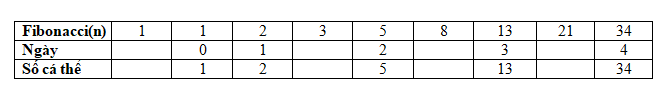

## Algorithm designed

Như đã nói trên, đây là một bài toán có dạng giống với bài toán tính dãy số Fibonacci.

Nếu như dãy Fibonacci có công thức $F(k) = F(k - 1) + F(k - 2)$ thì dãy Fibonacci trong bài này là $n.Fibo(2k + 1)) \% (10^{9} + 7)$.

Và chúng ta có đoạn chương trình sau:

In [4]:
%%time
n,k = map(int,input().split())
def fibo(n):
    f0 = 0
    f1 = 1
    fn = 1
    if (n == 1):
        return n
    else:
        for i in range(2, n):
            f0 = f1
            f1 = fn
            fn = f0 + f1
        return fn
print((n * fibo(2*k + 1)) % (10**9 + 7))

3 2
15
Wall time: 1.6 s


Nhưng lại xuất hiện vấn đề khác đó là nếu chúng ta nhập vào số **k** đủ lớn thì thời gian thực thi chương trình sẽ rất lâu.

Vì vậy chúng ta phải tìm cách giải quyết khác. 

Cụ thể ở đây thì chúng mình đề xuất nên sử dụng thuật toán **Biến đổi Fourier nhanh (FFT)** kết hợp với thuật toán **Chia để trị** để tính Fibonacci bằng **Ma trận** sẽ giúp thực hiện bài toán nhanh hơn rất nhiều.

Cụ thể, ta có công thức như sau:

$$\begin{bmatrix}
f(n) & f(n-1) \\ 
f(n-1) & f(n-2) 
\end{bmatrix}=
\begin{bmatrix}
1 & 1 \\ 
1 & 0
\end{bmatrix}^{n-1}$$

Với $f(n)$ là giá trị cần tìm.

Thuật toán **Biến đổi Fourier nhanh (FFT)**:

In [ ]:
MOD = 1000000007

def multiply(F,M):       #Nhân 2 ma trận F và M
  a = (F[0][0] * M[0][0] +  F[0][1] * M[1][0]) % MOD
  b = (F[0][0] * M[0][1] +  F[0][1] * M[1][1]) % MOD
  c = (F[1][0] * M[0][0] +  F[1][1] * M[1][0]) % MOD
  d = (F[1][0] * M[0][1] +  F[1][1] * M[1][1]) % MOD
  F[0][0] = a            #Gán giá trị mới vào ma trận F
  F[0][1] = b
  F[1][0] = c
  F[1][1] = d

Thuật toán **Chia để trị**:

In [ ]:
def power(F,n):          #Tính F^n
  if n == 0 or n == 1:   #Nếu n=0 hoặc n=1 thì out ra
    return
  M = [[1,1],[1,0]]      #Khởi tạo ma trận đơn vị M
  power(F, n // 2)       #Nếu là số chẵn thì = F^(n/2) * F^(n/2)
  multiply(F,F)          
  if n % 2 != 0:         #Nếu là số lẽ thì = F^(n/2) * F^(n/2) * F
    multiply(F,M)

Hàm main:

In [ ]:
def fibonacci(n):
  F = [[1,1],[1,0]]      #Khởi tạo ma trận đơn vị F
  if n == 0:    
    return 0             #Nếu n=0 thì trả về 0
  power(F, n - 1)        #Tính F^(n-1)
  return F[0][0]         #Trả về giá trị F(n) cần tìm

n, k = map(int,input().split())
print(n*fibonacci(2*k+1) % MOD)

## Complexity evaluate

* Time complexity : 
1. Thuật toán For - Loop: $O(n)$
2. Thuật toán tính **Fibonacci** bằng **Ma trận** kết hợp với **Biến đổi Fourier nhanh (FFT)** và **Chia để trị**: $O\log(n)$

## Programming

In [13]:
%%time
MOD = 1000000007

def multiply(F,M):
  a = (F[0][0] * M[0][0] +  F[0][1] * M[1][0]) % MOD
  b = (F[0][0] * M[0][1] +  F[0][1] * M[1][1]) % MOD
  c = (F[1][0] * M[0][0] +  F[1][1] * M[1][0]) % MOD
  d = (F[1][0] * M[0][1] +  F[1][1] * M[1][1]) % MOD
  F[0][0] = a
  F[0][1] = b
  F[1][0] = c
  F[1][1] = d
    
def power(F,n):
  if n == 0 or n == 1:
    return
  M = [[1,1],[1,0]]
  power(F, n // 2)  
  multiply(F,F)
  if n % 2 != 0:
    multiply(F,M)
    
def fibonacci(n):
  F = [[1,1],[1,0]]
  if n == 0:
    return 0
  power(F, n - 1)
  return F[0][0]

n, k = map(int,input().split())
print(n*fibonacci(2*k+1) % MOD)

3 2
15
Wall time: 953 ms
